### 1) Import Useful Packages

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

### 2) Load and Preview Data

In [3]:
#import data
df = pd.read_csv("amazon_alexa.tsv", sep="\t")

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
# Check the data type, missing value and the shape of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [16]:
# no# of comments for each product
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

### 3) EDA and Feature Engineer

In [15]:
# avg ratings for alexa product
df.groupby('variation').agg({"rating":"mean"}).sort_values('rating', ascending = False).head()

,rating
variation,
Walnut Finish,4.888889
Oak Finish,4.857143
Charcoal Fabric,4.730233
Heather Gray Fabric,4.694268
Configuration: Fire TV Stick,4.591429


In [8]:
#look at reviews
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [12]:
#how many for positive and negative feedbacks
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [14]:
#negative feedbacks
neg_feedback = df[df['feedback']==0 ]
neg_feedback

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


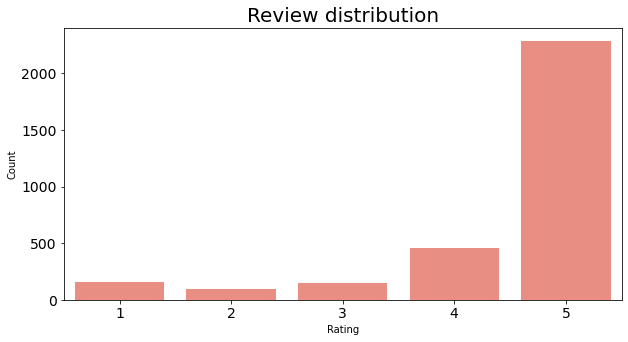

In [30]:
#review distribution
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x='rating',color = "salmon",data = df)
plt.xlabel('Rating', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.title("Review distribution", fontsize = 20)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

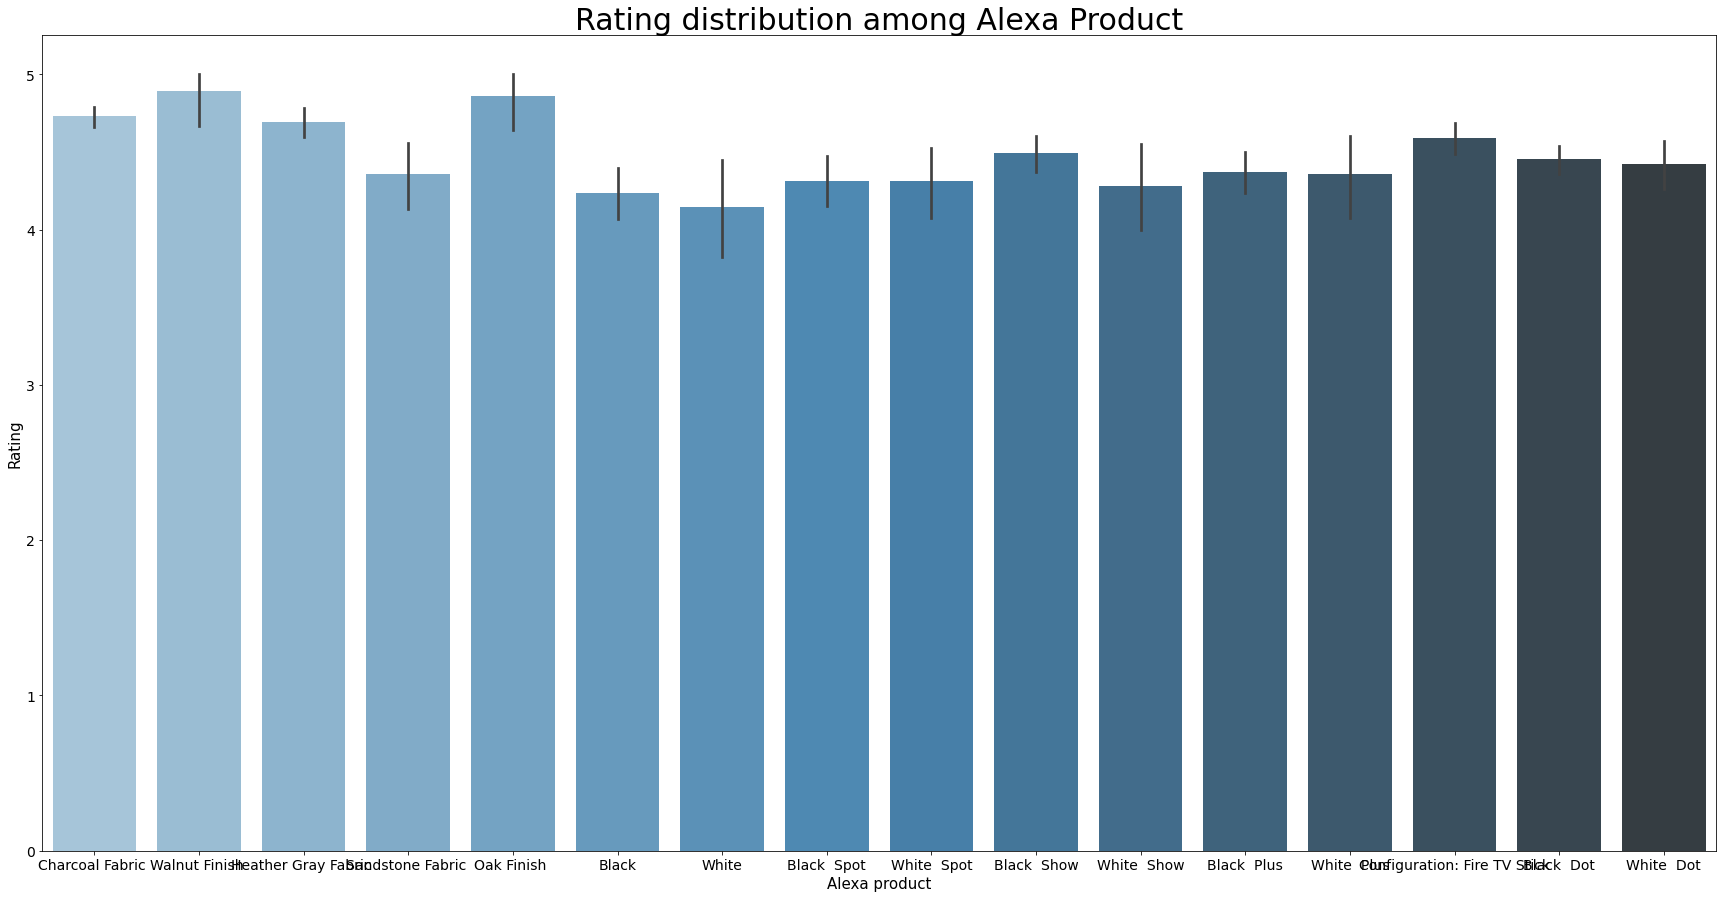

In [41]:
#Avg Rating for different Alexa products
plt.figure(figsize= (30,15))
sns.barplot(x = 'variation', y ='rating',data = df, palette = 'Blues_d')
plt.xlabel('Alexa product', fontsize = 15)
plt.ylabel('Rating', fontsize = 15)
plt.title("Rating distribution among Alexa Product", fontsize = 30)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

#### Drop Correlated and Unuseful Features

In [42]:
#The date and rating of users' comments have been removed. The date on which the comment is made does not matter about the comment. 
#It may cause overfitting as the given score will be directly proportional to the comment. 
#Therefore, the date and rating columns have been removed. 
df = df.drop(['date','rating'], axis=1)
df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


#### Create Dummy Variables for Alexa Products

In [43]:
# Each of the products has been adjusted for the random forest.
variation_dummies = pd.get_dummies(df['variation'], drop_first = True)
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [44]:
df.drop(['variation'], axis=1, inplace=True)
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [46]:
df = pd.concat([df, variation_dummies], axis =1)
df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 4) Model Preparation

In [47]:
# All of the comments have been vectorized. 
# Each word in the data set was expressed as a number. 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])
alexa_countvectorizer.shape

(3150, 4044)

In [48]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
df.drop(['verified_reviews'], axis=1, inplace = True)
df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [51]:
vector_reviews = pd.DataFrame(alexa_countvectorizer.toarray())
vector_reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df = pd.concat([df, encoded_reviews], axis=1)
df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5) Random Forest Classification

In [56]:
X = df.drop(['feedback'], axis=1)
y = df['feedback']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state =5 )
print("X_train Size :",X_train.shape)
print("X_test Size :",X_test.shape)
print("y_train Size :",y_train.shape)
print("y_test Size :",y_test.shape)

X_train Size : (2362, 4059)
X_test Size : (788, 4059)
y_train Size : (2362,)
y_test Size : (788,)


In [64]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators= 100 , criterion='entropy')
randomforest_classifier.fit(X_train,y_train)
y_predict = randomforest_classifier.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.19      0.30        75
           1       0.92      1.00      0.96       713

    accuracy                           0.92       788
   macro avg       0.87      0.59      0.63       788
weighted avg       0.91      0.92      0.89       788



#####  Hyperparameter Tuning

In [66]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
             "max_depth": [3,5,8,None]}

rf_model = RandomForestClassifier(random_state = 357)

rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1,verbose = 1).fit(X_train, y_train)

rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X,y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [67]:
tuned = [rf_tuned]
print("Best Model Parameters and Scores:")
for i in tuned:
    score = cross_val_score(i, X_train, y_train, cv = 10).mean()
    print(i,"score:",score)

Best Model Parameters and Scores:
RandomForestClassifier(max_features=5) score: 0.9352195523135236
